# Session 9: Introduction to Plotting

In [1]:
import pandas as pd
base='https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/'
filename='gapminder.tsv'
data=pd.read_csv(base+filename,sep='\t').set_index('year')
usa=data.query('country=="United States"')
usa.head()

,country,continent,lifeExp,pop,gdpPercap
year,,,,,
1952,United States,Americas,68.44,157553000,13990.48208
1957,United States,Americas,69.49,171984000,14847.12712
1962,United States,Americas,70.21,186538000,16173.14586
1967,United States,Americas,70.76,198712000,19530.36557
1972,United States,Americas,71.34,209896000,21806.03594


## 1. Customizing Plots using Pandas

In [2]:
import matplotlib.pyplot as plt
usa.plot()
plt.show()

<Figure size 640x480 with 1 Axes>

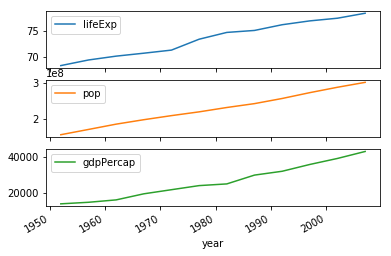

In [3]:
usa.plot(subplots=True)
plt.show()

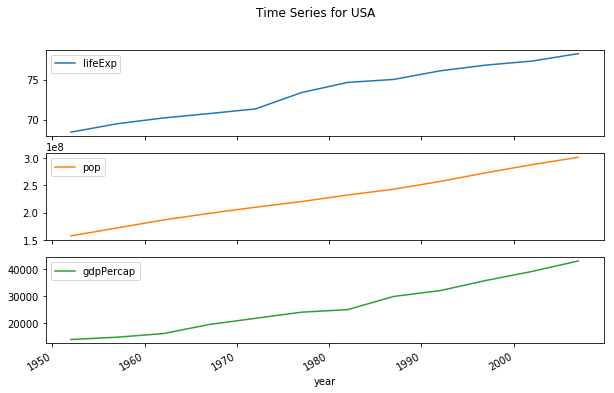

In [4]:
usa.plot(subplots=True,title='Time Series for USA',figsize=(10,6))
plt.show()

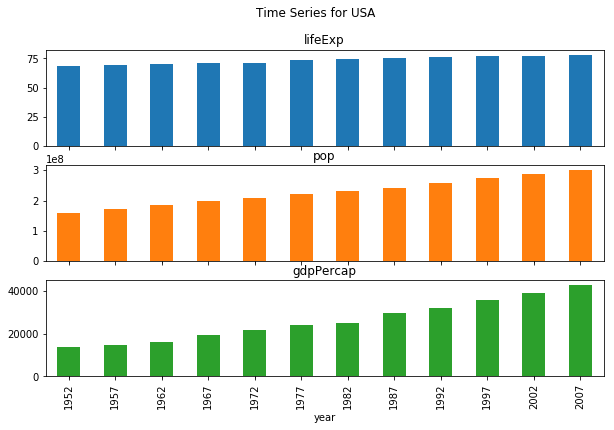

In [5]:
usa.plot(kind='bar',subplots=True,title='Time Series for USA',figsize=(10,6),legend=False)
plt.show()

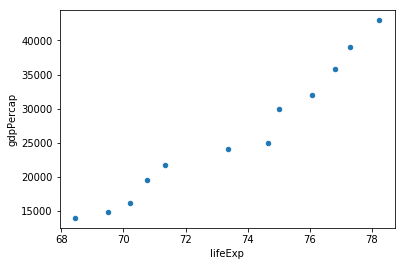

In [6]:
usa.plot(x='lifeExp',y='gdpPercap',kind='scatter')
plt.show()

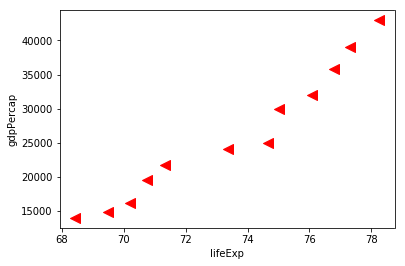

In [7]:
usa.plot(x='lifeExp',y='gdpPercap',c='r',s=100,marker='<',kind='scatter')
plt.show()

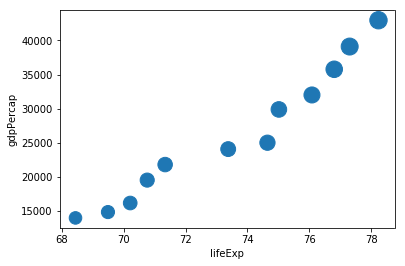

In [8]:
usa.plot(x='lifeExp',y='gdpPercap',s=usa['pop']/1000000,kind='scatter')
plt.show()

**Q1:** Read the documentation on the "pd.DataFrame.plot" function using "help(usa.plot)" and find out all the possible parameters for the argument "kind". Experiment with at least three different settings to create alternative plots of the "usa" DataFrame.

## 2. Customizing Plots using Matplotlib

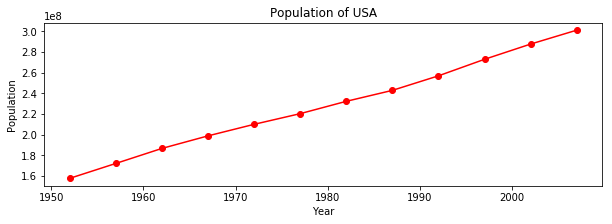

In [9]:
fig,ax=plt.subplots(figsize=(10,3))
usa['pop'].plot(ax=ax,c='r',marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Population of USA')
plt.show()
fig.savefig('usa_pop.png')

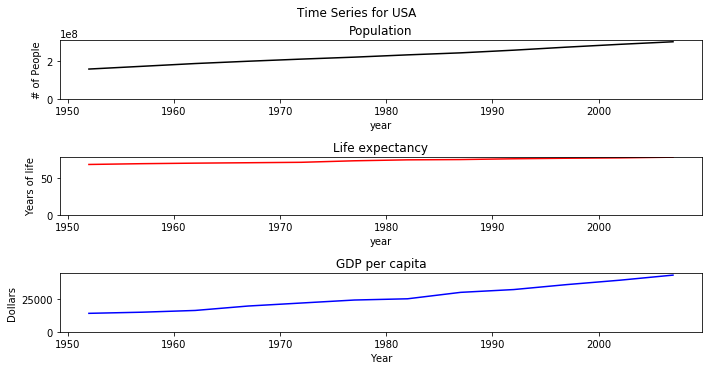

In [10]:
fig,ax=plt.subplots(3,1,figsize=(10,5))
usa['pop'].plot(ax=ax[0],c='k')
usa['lifeExp'].plot(ax=ax[1],c='r')
usa['gdpPercap'].plot(ax=ax[2],c='b')
fig.suptitle('Time Series for USA',y=1.02)
ax[0].set_title('Population')
ax[0].set_ylabel('# of People')
ax[0].set_ylim(bottom=0)
ax[1].set_title('Life expectancy')
ax[1].set_ylabel('Years of life')
ax[1].set_ylim(bottom=0)
ax[2].set_title('GDP per capita')
ax[2].set_ylabel('Dollars')
ax[2].set_xlabel('Year')
ax[2].set_ylim(bottom=0)
plt.tight_layout()
plt.show()
fig.savefig('usa_all.png')

**Q2:** Propose one asthetic change you would make to the above plot and Google how to make it happen using the keyword "matplotlib" and the change you would like to make. Implement in the above graph.

## 3. Designing Effective Visualizations

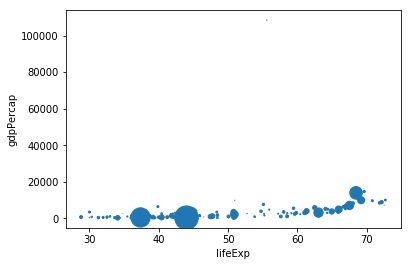

In [11]:
import numpy as np
data1952=data.query('year==1952')
data1952.plot(x='lifeExp',y='gdpPercap',s=data1952['pop']*1e-6,kind='scatter')
plt.show()

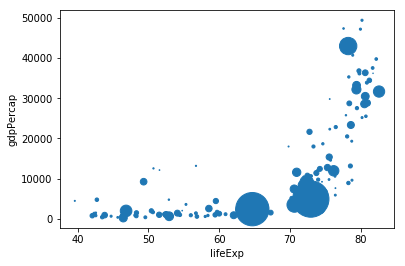

In [12]:
data2007=data.query('year==2007')
data2007.plot(x='lifeExp',y='gdpPercap',s=data2007['pop']*1e-6,kind='scatter')
plt.show()

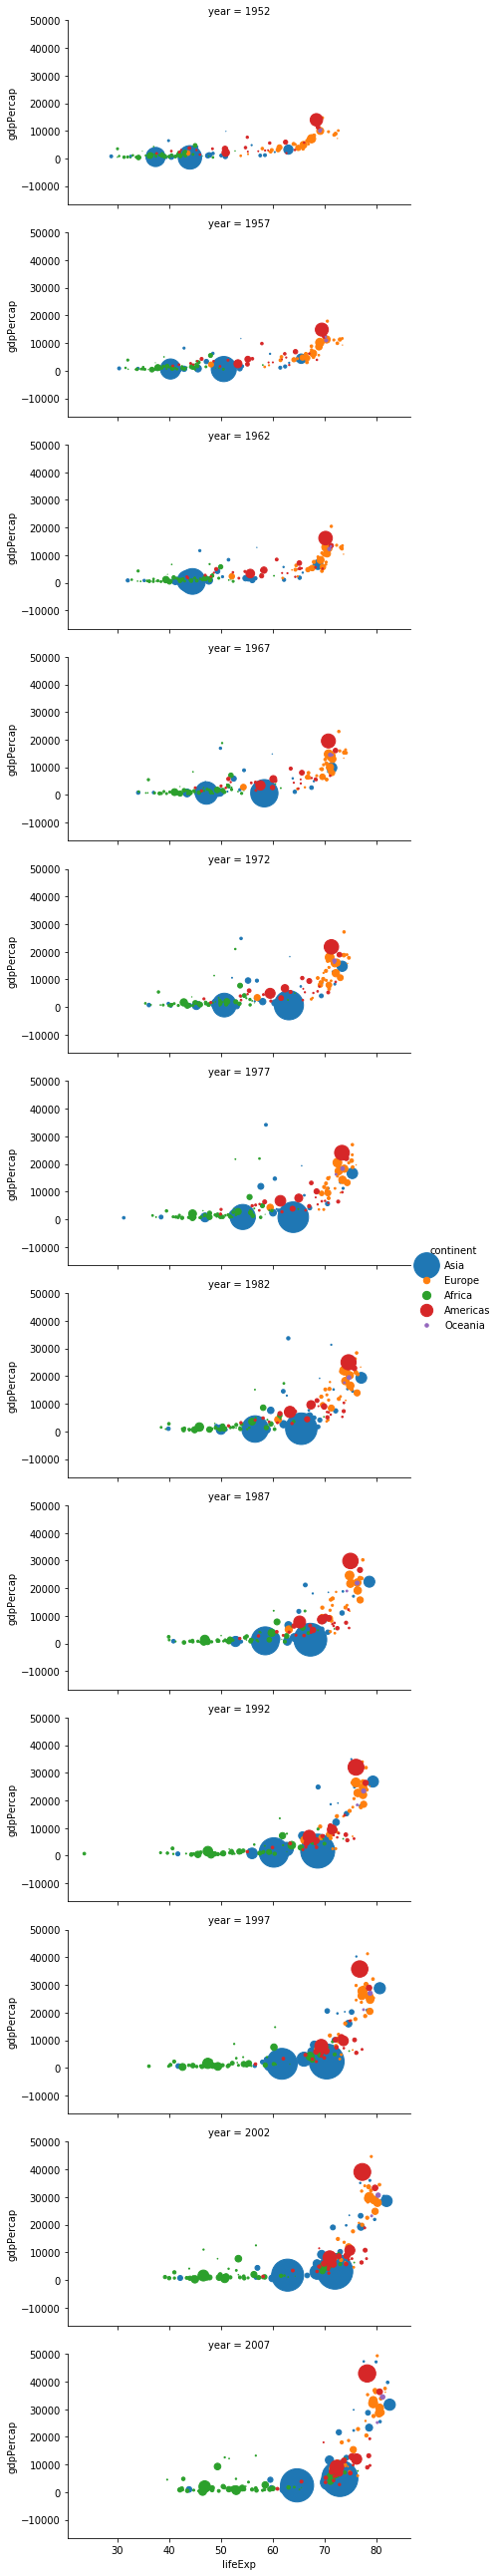

In [13]:
import seaborn as sns
data2=data.reset_index()
data2['pop']/=1e6
g=sns.FacetGrid(data2,row='year',hue='continent',aspect=2)
g.map(plt.scatter, 'lifeExp','gdpPercap','pop').add_legend()
plt.ylim(top=50000)
plt.show()